In [13]:
import pandas as pd
import plotly.express as px

df_followers_ACV = pd.read_csv("followers_ACV.csv", sep=';')
df_players_ACV = pd.read_csv("players_ACV.csv", sep=';')
df_prices_ACV = pd.read_csv("prices_ACV.csv", sep=';')
df_reviews_ACV = pd.read_csv("reviews_ACV.csv", sep=';')

df_followers_WDL = pd.read_csv("followers_WDL.csv", sep=';')
df_players_WDL = pd.read_csv("players_WDL.csv", sep=';')
df_prices_WDL = pd.read_csv("prices_WDL.csv", sep=';')
df_reviews_WDL = pd.read_csv("reviews_WDL.csv", sep=';')

df_followers_FC = pd.read_csv("followers_FC.csv", sep=';')
df_players_FC = pd.read_csv("players_FC.csv", sep=';')
df_prices_FC = pd.read_csv("prices_FC.csv", sep=';')
df_reviews_FC = pd.read_csv("reviews_FC.csv", sep=';')


FileNotFoundError: [Errno 2] No such file or directory: 'followers_ACV.csv'

In [14]:
# Convertir la colonne 'DateTime' du DataFrame 'df_followers_ACV' en type datetime
df_followers_ACV['DateTime'] = pd.to_datetime(df_followers_ACV['DateTime'])
df_players_ACV['DateTime'] = pd.to_datetime(df_players_ACV['DateTime'])
df_prices_ACV['DateTime'] = pd.to_datetime(df_prices_ACV['DateTime'])
df_reviews_ACV['DateTime'] = pd.to_datetime(df_reviews_ACV['DateTime'])

df_followers_WDL['DateTime'] = pd.to_datetime(df_followers_WDL['DateTime'])
df_players_WDL['DateTime'] = pd.to_datetime(df_players_WDL['DateTime'])
df_prices_WDL['DateTime'] = pd.to_datetime(df_prices_WDL['DateTime'])
df_reviews_WDL['DateTime'] = pd.to_datetime(df_reviews_WDL['DateTime'])

df_followers_FC['DateTime'] = pd.to_datetime(df_followers_FC['DateTime'])
df_players_FC['DateTime'] = pd.to_datetime(df_players_FC['DateTime'])
df_prices_FC['DateTime'] = pd.to_datetime(df_prices_FC['DateTime'])
df_reviews_FC['DateTime'] = pd.to_datetime(df_reviews_FC['DateTime'])

In [9]:
df_steam_ACV = df_followers_ACV.merge(df_players_ACV, on='DateTime', how='outer')  # Fusion des données des abonnés et des joueurs sur la colonne 'DateTime' avec une jointure externe
df_steam_ACV = df_steam_ACV.merge(df_prices_ACV, on='DateTime', how='outer')  # Ajout des données de prix à la fusion précédente
df_steam_ACV = df_steam_ACV.merge(df_reviews_ACV, on='DateTime', how='outer')  # Ajout des données des avis à la fusion précédente


df_steam_WDL = df_followers_WDL.merge(df_players_WDL, on='DateTime', how='outer')
df_steam_WDL = df_steam_WDL.merge(df_prices_WDL, on='DateTime', how='outer')
df_steam_WDL = df_steam_WDL.merge(df_reviews_WDL, on='DateTime', how='outer')

df_steam_FC = df_followers_FC.merge(df_players_FC, on='DateTime', how='outer')
df_steam_FC = df_steam_FC.merge(df_prices_FC, on='DateTime', how='outer')
df_steam_FC = df_steam_FC.merge(df_reviews_FC, on='DateTime', how='outer')

In [10]:
df_steam_ACV = df_steam_ACV.drop(columns=['Average Players', 'Historical low'], errors='ignore')# Supprimer les colonnes 'Average Players' et 'Historical low' du DataFrame d'Assassin's Creed Valhalla
df_steam_WDL = df_steam_WDL.drop(columns=['Average Players', 'Historical low'], errors='ignore')
df_steam_FC = df_steam_FC.drop(columns=['Average Players', 'Historical low'], errors='ignore')

In [2]:
import pandas as pd

In [3]:
df_steam_ACV= pd.read_csv("df_steam_ACV.csv")
df_steam_WDL= pd.read_csv("df_steam_WDL.csv")
df_steam_FC= pd.read_csv("df_steam_FC.csv")


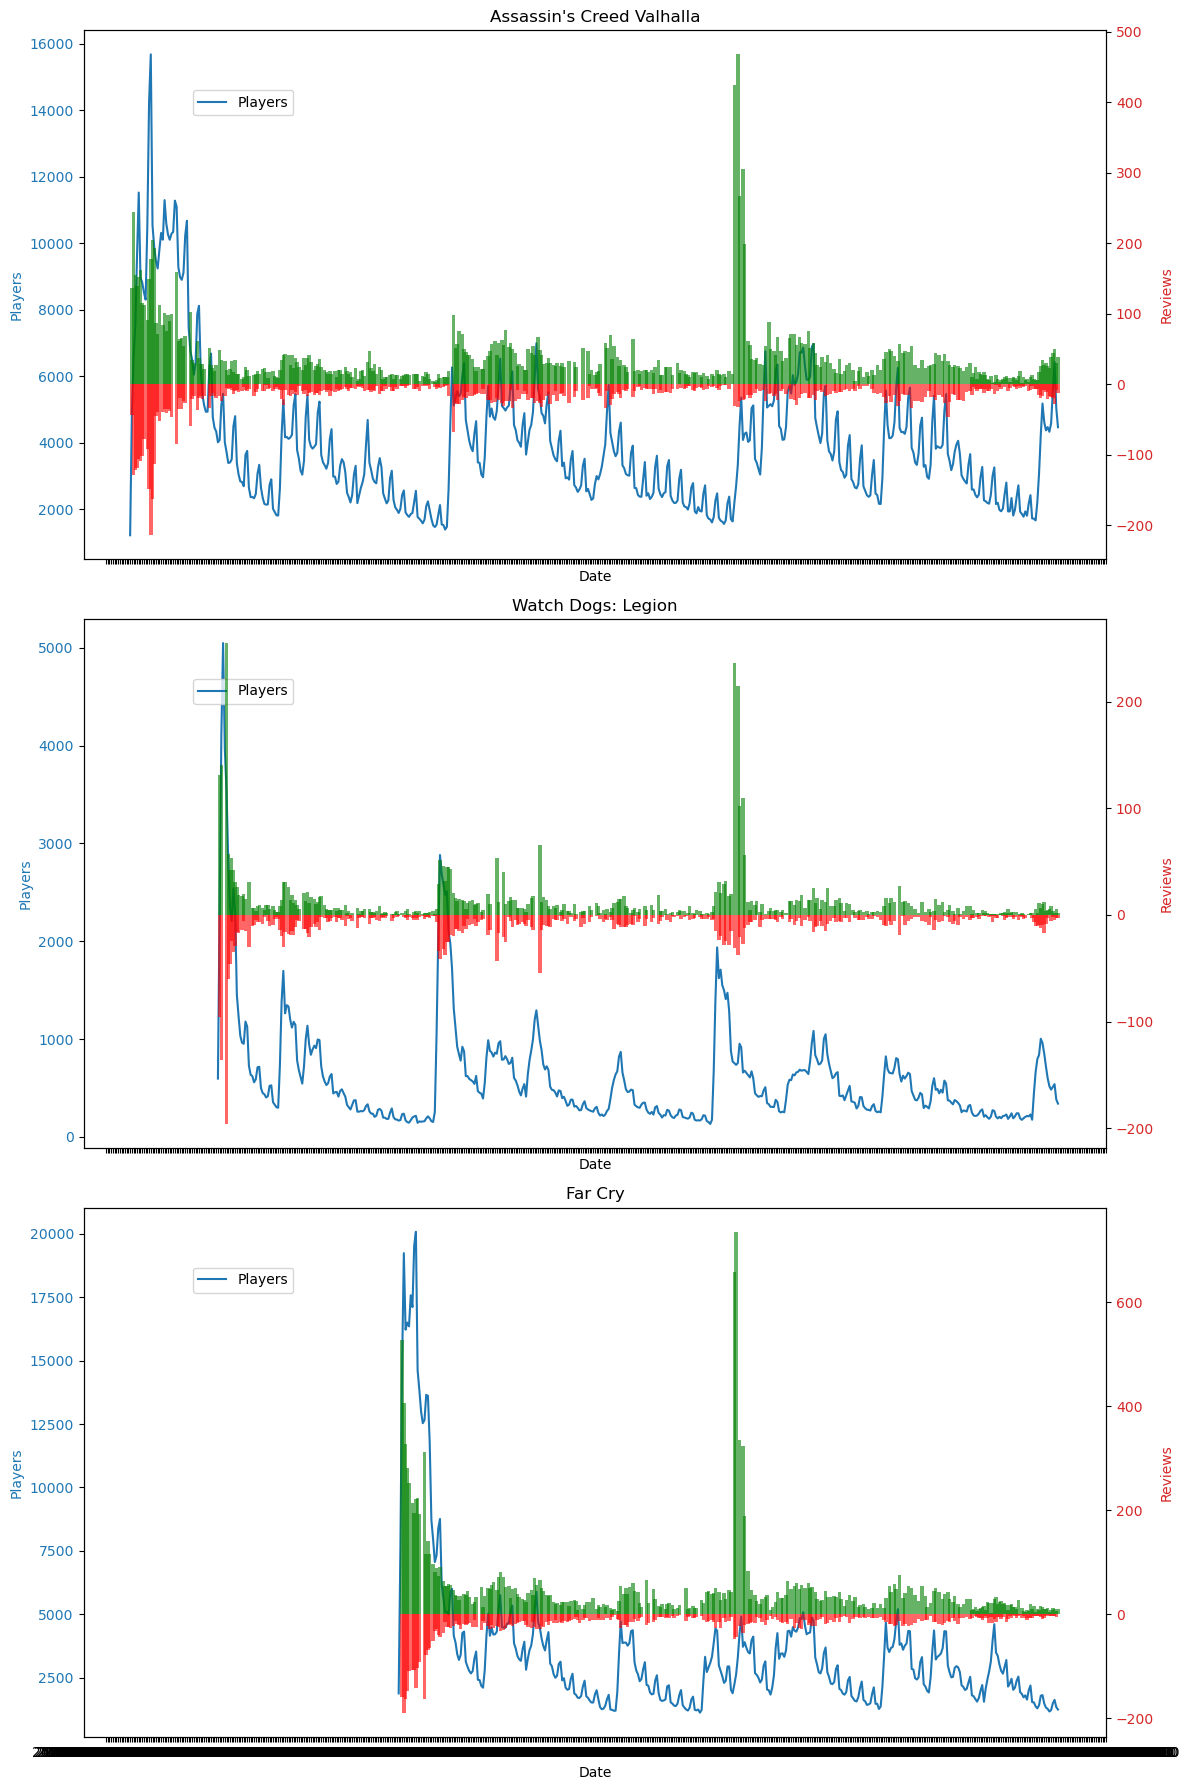

In [4]:
import matplotlib.pyplot as plt

# Définir la date de fin
end_date = '2024-05-29'

# Filtrer les DataFrames jusqu'à la date de fin
df_filtered_ACV = df_steam_ACV[df_steam_ACV['DateTime'] <= end_date]  # Filtrer les données pour Assassin's Creed Valhalla
df_filtered_WDL = df_steam_WDL[df_steam_WDL['DateTime'] <= end_date]  # Filtrer les données pour Watch Dogs: Legion
df_filtered_FC = df_steam_FC[df_steam_FC['DateTime'] <= end_date]  # Filtrer les données pour Far Cry

# Créer les subplots verticaux
fig, axs = plt.subplots(nrows=3, figsize=(12, 18), sharex=True)  # Créer une figure avec trois subplots verticaux partageant le même axe x

# Liste des DataFrames et des titres pour les subplots
dataframes = [(df_filtered_ACV, 'Assassin\'s Creed Valhalla'), 
              (df_filtered_WDL, 'Watch Dogs: Legion'), 
              (df_filtered_FC, 'Far Cry')]

# Boucle pour tracer les données sur chaque subplot
for ax, (df_filtered, title) in zip(axs, dataframes):
    # Tracer le nombre de joueurs en ligne
    color = 'tab:blue'
    ax.set_xlabel('Date')  # Définir l'étiquette de l'axe x
    ax.set_ylabel('Players', color=color)  # Définir l'étiquette de l'axe y pour les joueurs
    ax.plot(df_filtered['DateTime'], df_filtered['Players'], label='Players', color=color)  # Tracer les joueurs en ligne
    ax.tick_params(axis='y', labelcolor=color)  # Définir la couleur des ticks de l'axe y

    # Créer un deuxième axe pour les barres
    ax2 = ax.twinx()  # Créer un deuxième axe y partageant le même axe x
    ax2.set_ylabel('Reviews', color='tab:red')  # Définir l'étiquette de l'axe y pour les avis
    ax2.bar(df_filtered['DateTime'], df_filtered['Positive reviews'], width=2, label='Positive Reviews', color='green', alpha=0.6)  # Tracer les avis positifs en barres vertes
    ax2.bar(df_filtered['DateTime'], df_filtered['Negative reviews'], width=2, label='Negative Reviews', color='red', alpha=0.6)  # Tracer les avis négatifs en barres rouges
    ax2.tick_params(axis='y', labelcolor='tab:red')  # Définir la couleur des ticks de l'axe y pour les avis

    ax.set_title(title)  # Définir le titre du subplot
    ax.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))  # Placer la légende
    fig.tight_layout()  # Ajuster l'agencement de la figure pour éviter les chevauchements
    plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe x de 45 degrés

plt.show()  # Afficher les graphiques



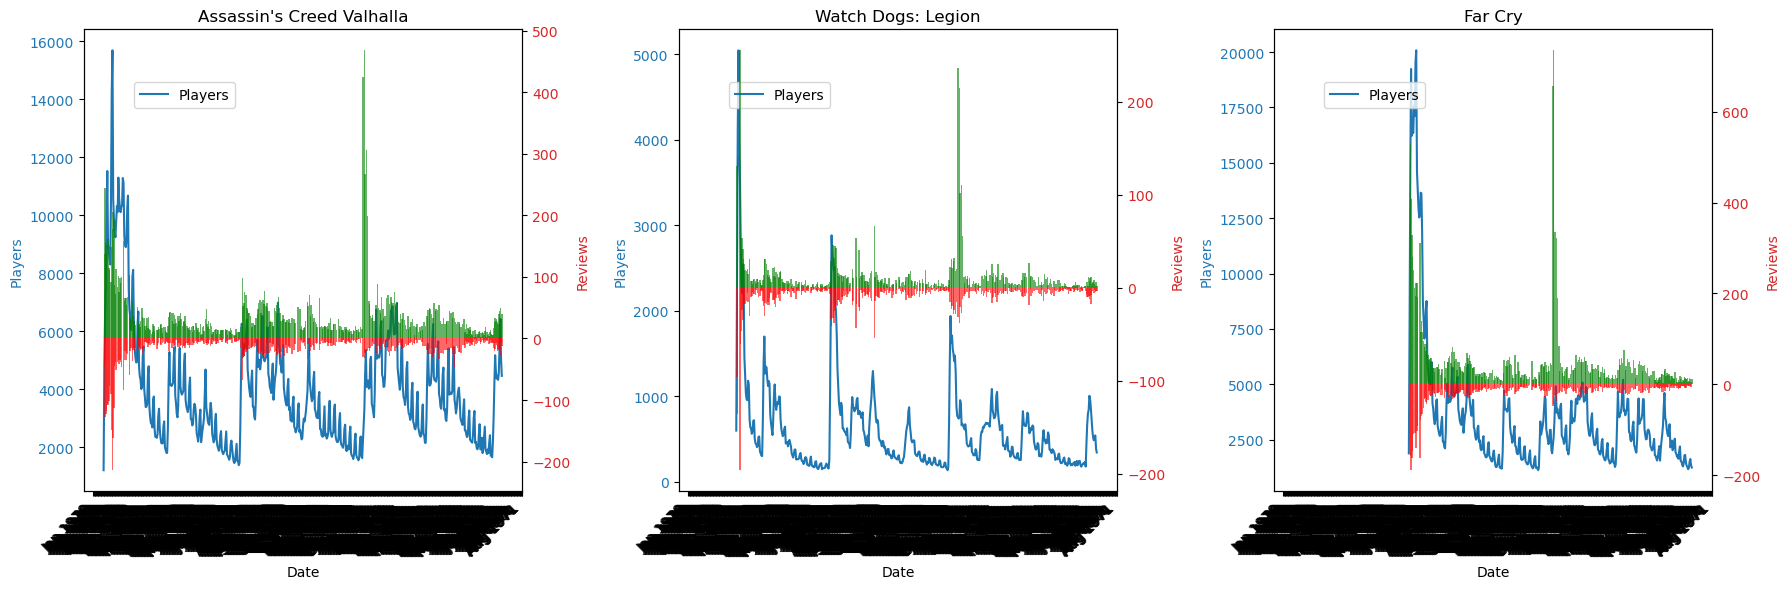

In [9]:
import matplotlib.pyplot as plt

# Définir la date de fin
end_date = '2024-05-29'

# Filtrer les DataFrames jusqu'à la date de fin
df_filtered_ACV = df_steam_ACV[df_steam_ACV['DateTime'] <= end_date]  # Filtrer les données pour Assassin's Creed Valhalla
df_filtered_WDL = df_steam_WDL[df_steam_WDL['DateTime'] <= end_date]  # Filtrer les données pour Watch Dogs: Legion
df_filtered_FC = df_steam_FC[df_steam_FC['DateTime'] <= end_date]  # Filtrer les données pour Far Cry

# Créer les subplots horizontaux
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=False, sharex=True)  # Créer une figure avec trois subplots horizontaux partageant le même axe y

# Liste des DataFrames et des titres pour les subplots
dataframes = [(df_filtered_ACV, 'Assassin\'s Creed Valhalla'), 
              (df_filtered_WDL, 'Watch Dogs: Legion'), 
              (df_filtered_FC, 'Far Cry')]

# Boucle pour tracer les données sur chaque subplot
for ax, (df_filtered, title) in zip(axs, dataframes):
    # Tracer le nombre de joueurs en ligne
    color = 'tab:blue'
    ax.set_xlabel('Date')  # Définir l'étiquette de l'axe x
    ax.set_ylabel('Players', color=color)  # Définir l'étiquette de l'axe y pour les joueurs
    ax.plot(df_filtered['DateTime'], df_filtered['Players'], label='Players', color=color)  # Tracer les joueurs en ligne
    ax.tick_params(axis='y', labelcolor=color)  # Définir la couleur des ticks de l'axe y

    # Créer un deuxième axe pour les barres
    ax2 = ax.twinx()  # Créer un deuxième axe y partageant le même axe x
    ax2.set_ylabel('Reviews', color='tab:red')  # Définir l'étiquette de l'axe y pour les avis
    ax2.bar(df_filtered['DateTime'], df_filtered['Positive reviews'], width=2, label='Positive Reviews', color='green', alpha=0.6)  # Tracer les avis positifs en barres vertes
    ax2.bar(df_filtered['DateTime'], df_filtered['Negative reviews'], width=2, label='Negative Reviews', color='red', alpha=0.6)  # Tracer les avis négatifs en barres rouges
    ax2.tick_params(axis='y', labelcolor='tab:red')  # Définir la couleur des ticks de l'axe y pour les avis

    ax.set_title(title)  # Définir le titre du subplot
    ax.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))  # Placer la légende
    fig.tight_layout()  # Ajuster l'agencement de la figure pour éviter les chevauchements
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))  # Afficher le mois et l'année sur l'axe x
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # Faire pivoter les étiquettes de l'axe x de 45 degrés

plt.show()  # Afficher les graphiques


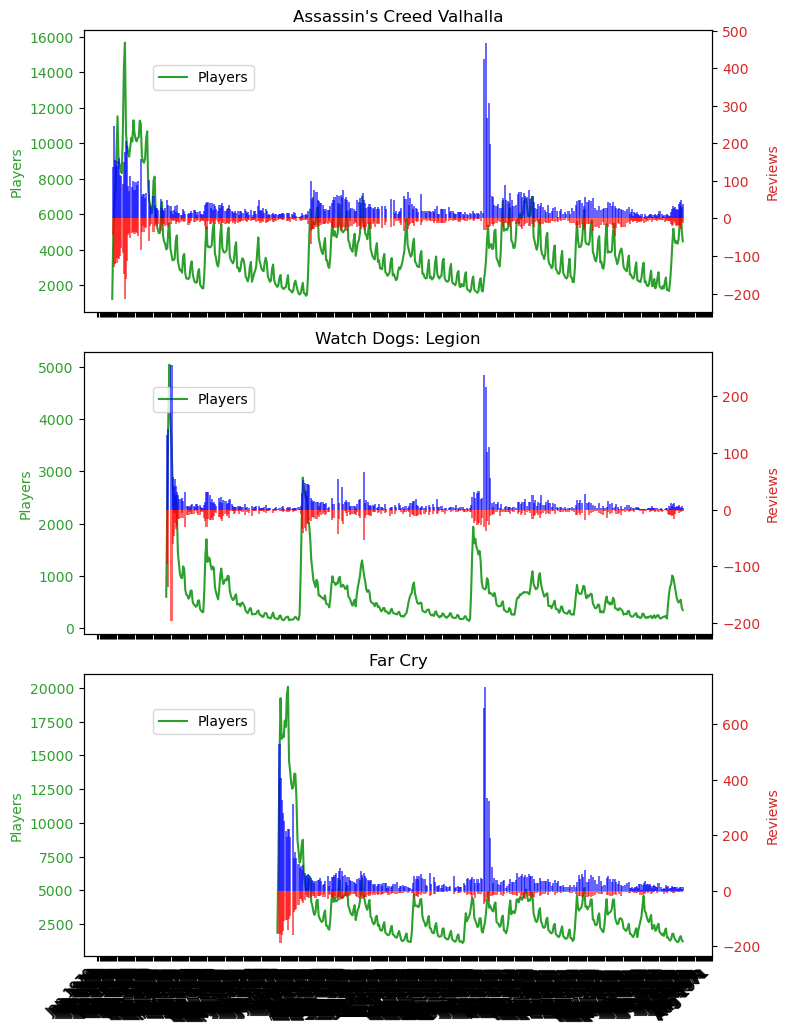

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Définir la date de fin
end_date = '2024-05-29'

# Filtrer les DataFrames jusqu'à la date de fin
df_filtered_ACV = df_steam_ACV[df_steam_ACV['DateTime'] <= end_date]  # Filtrer les données pour Assassin's Creed Valhalla
df_filtered_WDL = df_steam_WDL[df_steam_WDL['DateTime'] <= end_date]  # Filtrer les données pour Watch Dogs: Legion
df_filtered_FC = df_steam_FC[df_steam_FC['DateTime'] <= end_date]  # Filtrer les données pour Far Cry

# Créer les subplots verticaux
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 10), sharex=True)  # Créer une figure avec trois subplots verticaux partageant le même axe x

# Liste des DataFrames et des titres pour les subplots
dataframes = [(df_filtered_ACV, 'Assassin\'s Creed Valhalla'), 
              (df_filtered_WDL, 'Watch Dogs: Legion'), 
              (df_filtered_FC, 'Far Cry')]

# Boucle pour tracer les données sur chaque subplot
for ax, (df_filtered, title) in zip(axs, dataframes):
    # Tracer le nombre de joueurs en ligne
    color = 'tab:green'
    ax.set_ylabel('Players', color=color)  # Définir l'étiquette de l'axe y pour les joueurs
    ax.plot(df_filtered['DateTime'], df_filtered['Players'], label='Players', color=color)  # Tracer les joueurs en ligne
    ax.tick_params(axis='y', labelcolor=color)  # Définir la couleur des ticks de l'axe y

    # Créer un deuxième axe pour les barres
    ax2 = ax.twinx()  # Créer un deuxième axe y partageant le même axe x
    ax2.set_ylabel('Reviews', color='tab:red')  # Définir l'étiquette de l'axe y pour les avis
    ax2.bar(df_filtered['DateTime'], df_filtered['Positive reviews'], width=2, label='Positive Reviews', color='blue', alpha=0.6)  # Tracer les avis positifs en barres vertes
    ax2.bar(df_filtered['DateTime'], df_filtered['Negative reviews'], width=2, label='Negative Reviews', color='red', alpha=0.6)  # Tracer les avis négatifs en barres rouges
    ax2.tick_params(axis='y', labelcolor='tab:red')  # Définir la couleur des ticks de l'axe y pour les avis

    ax.set_title(title)  # Définir le titre du subplot
    ax.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))  # Placer la légende
    fig.tight_layout()  # Ajuster l'agencement de la figure pour éviter les chevauchements
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Afficher le mois et l'année sur l'axe x
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # Faire pivoter les étiquettes de l'axe x de 45 degrés

plt.show()  # Afficher les graphiques


In [ ]:
#Il semble y avoir une relation entre les avis positifs et négatifs et le nombre de joueurs pour les trois jeux analysés :

#1-Corrélation Positive : Lorsque le nombre de joueurs augmente, le nombre d'avis (surtout positifs) augmente également. 
#Cela peut s'expliquer par une plus grande visibilité et interaction avec le jeu lors des pics de joueurs.

#2-Avis Négatifs : Bien que les avis positifs soient plus nombreux lors des pics de joueurs, les avis négatifs augmentent également. 
#Cela peut refléter une plus grande diversité d'opinions lorsque plus de joueurs interagissent avec le jeu.

#3-Impact des Événements : Les pics de joueurs, souvent liés à des événements spécifiques (lancements, mises à jour, promotions), génèrent plus d'avis.

#Ces observations suggèrent que les périodes de forte activité des joueurs sont cruciales pour recueillir des avis, tant positifs que négatifs. 
#Analyser ces périodes peut offrir des insights sur les réactions des joueurs et aider à comprendre l'impact des événements spécifiques 
#sur l'engagement des joueurs.

In [18]:
df_steam_ACV = pd.read_csv("df_steam_ACV.csv")
df_steam_WDL = pd.read_csv("df_steam_WDL.csv")
df_steam_FC = pd.read_csv("df_steam_FC.csv")

In [25]:
df_steam_ACV.head()

,DateTime,Followers,Players,Twitch Viewers,Final price,Positive reviews,Negative reviews
0,2022-11-22 00:00:00,1185.0,NaN,471.0,NaN,NaN,NaN
1,2022-11-23 00:00:00,2003.0,NaN,932.0,NaN,NaN,NaN
2,2022-11-24 00:00:00,2375.0,NaN,429.0,NaN,NaN,NaN
3,2022-11-25 00:00:00,2619.0,NaN,530.0,NaN,NaN,NaN
4,2022-11-26 00:00:00,2878.0,NaN,297.0,NaN,NaN,NaN


In [24]:
df_steam_WDL.head()

,DateTime,Followers,Players,Twitch Viewers,Final price,Positive reviews,Negative reviews
0,2022-12-14 00:00:00,698.0,NaN,1372.0,NaN,NaN,NaN
1,2022-12-15 00:00:00,1148.0,NaN,1096.0,NaN,NaN,NaN
2,2022-12-16 00:00:00,1403.0,NaN,1045.0,NaN,NaN,NaN
3,2022-12-17 00:00:00,1548.0,NaN,79.0,NaN,NaN,NaN
4,2022-12-18 00:00:00,1649.0,NaN,827.0,NaN,NaN,NaN


In [27]:
df_steam_FC.head()

,DateTime,Followers,Players,Twitch Viewers,Final price,Positive reviews,Negative reviews
0,2023-04-22,363.0,NaN,121.0,NaN,NaN,NaN
1,2023-04-23,741.0,NaN,210.0,NaN,NaN,NaN
2,2023-04-24,1180.0,NaN,168.0,NaN,NaN,NaN
3,2023-04-25,1606.0,NaN,125.0,NaN,NaN,NaN
4,2023-04-26,1865.0,NaN,108.0,NaN,NaN,NaN


In [14]:
# Convertir la colonne 'Final price' en type string pour chaque DataFrame
df_steam_ACV['Final price'] = df_steam_ACV['Final price'].astype(str)
df_steam_WDL['Final price'] = df_steam_WDL['Final price'].astype(str)
df_steam_FC['Final price'] = df_steam_FC['Final price'].astype(str)

# Convertir les prix en float
# Remplacer les virgules par des points dans la colonne 'Final price' et convertir en float pour chaque DataFrame
df_steam_ACV['Final price'] = df_steam_ACV['Final price'].str.replace(',', '.').astype(float)
df_steam_WDL['Final price'] = df_steam_WDL['Final price'].str.replace(',', '.').astype(float)
df_steam_FC['Final price'] = df_steam_FC['Final price'].str.replace(',', '.').astype(float)

df_steam_ACV['DateTime'] = pd.to_datetime(df_steam_ACV['DateTime'])
df_steam_WDL['DateTime'] = pd.to_datetime(df_steam_WDL['DateTime'])
df_steam_FC['DateTime'] = pd.to_datetime(df_steam_FC['DateTime'])

In [12]:
df_steam_ACV.to_csv('df_steam_ACV.csv', index=False)
df_steam_WDL.to_csv('df_steam_WDL.csv', index=False)
df_steam_FC.to_csv('df_steam_FC.csv', index=False)

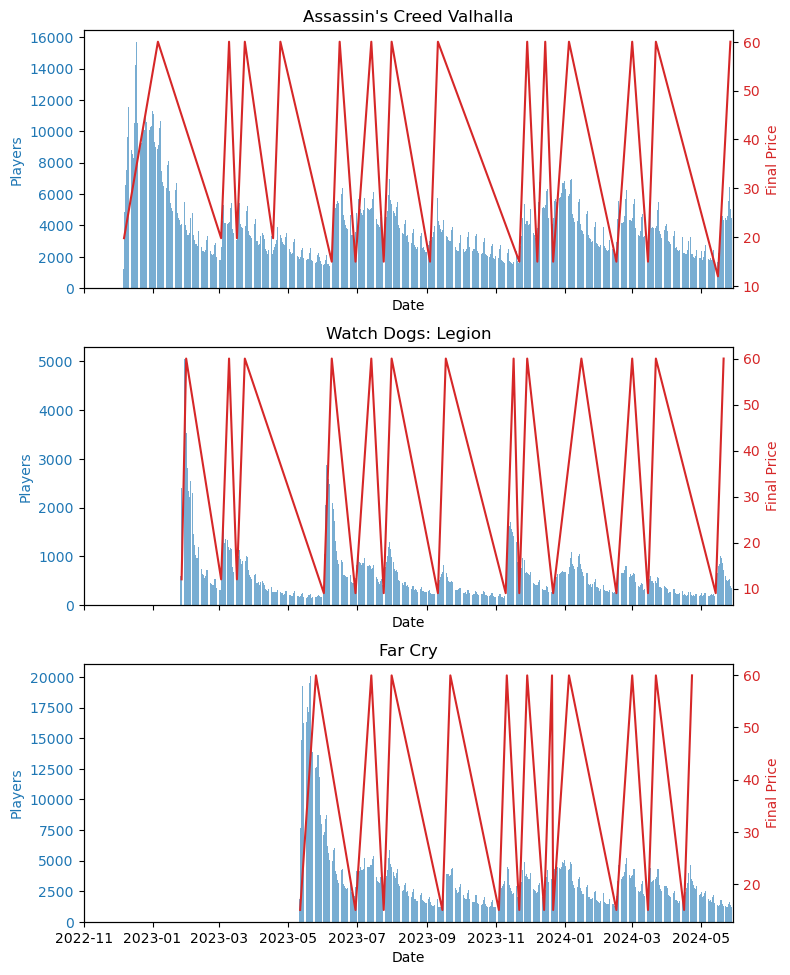

In [16]:
import matplotlib.pyplot as plt

# Définir les dates de début et de fin
end_date = '2024-05-29'  # Date de fin pour le filtrage des données
start_date = '2022-11-01'  # Date de début pour le filtrage des données

# Filtrer les DataFrames jusqu'à la date de fin et à partir de la date de début
df_filtered_ACV = df_steam_ACV[(df_steam_ACV['DateTime'] >= start_date) & (df_steam_ACV['DateTime'] <= end_date)].copy()  # Filtrer les données pour Assassin's Creed Valhalla
df_filtered_WDL = df_steam_WDL[(df_steam_WDL['DateTime'] >= start_date) & (df_steam_WDL['DateTime'] <= end_date)].copy()  # Filtrer les données pour Watch Dogs: Legion
df_filtered_FC = df_steam_FC[(df_steam_FC['DateTime'] >= start_date) & (df_steam_FC['DateTime'] <= end_date)].copy()  # Filtrer les données pour Far Cry

# Remplacer les NaN dans 'Players' par 0 pour éviter des problèmes
df_filtered_ACV['Players'].fillna(0, inplace=True)  # Remplacer les valeurs NaN dans 'Players' par 0 pour Assassin's Creed Valhalla
df_filtered_WDL['Players'].fillna(0, inplace=True)  # Remplacer les valeurs NaN dans 'Players' par 0 pour Watch Dogs: Legion
df_filtered_FC['Players'].fillna(0, inplace=True)  # Remplacer les valeurs NaN dans 'Players' par 0 pour Far Cry

# Créer les subplots verticaux
fig, axs = plt.subplots(nrows=3, figsize=(8, 10), sharex=True)  # Créer une figure avec trois subplots verticaux partageant le même axe x

# Liste des DataFrames et des titres pour les subplots
dataframes = [(df_filtered_ACV, 'Assassin\'s Creed Valhalla'), 
              (df_filtered_WDL, 'Watch Dogs: Legion'), 
              (df_filtered_FC, 'Far Cry')]

# Boucle pour tracer les données sur chaque subplot
for ax, (df_filtered, title) in zip(axs, dataframes):
    # Tracer le nombre de joueurs en ligne en barres
    color = 'tab:blue'
    ax.set_xlabel('Date')  # Définir l'étiquette de l'axe x
    ax.set_ylabel('Players', color=color)  # Définir l'étiquette de l'axe y pour les joueurs
    ax.bar(df_filtered['DateTime'], df_filtered['Players'], label='Players', color=color, alpha=0.6)  # Tracer les joueurs en ligne en barres
    ax.tick_params(axis='y', labelcolor=color)  # Définir la couleur des ticks de l'axe y

    # Ajuster les limites de l'axe des x pour éliminer l'espace vide
    ax.set_xlim([df_filtered['DateTime'].min(), df_filtered['DateTime'].max()])  # Ajuster les limites de l'axe x pour inclure uniquement les dates filtrées

    # Créer un deuxième axe pour les lignes
    ax2 = ax.twinx()  # Créer un deuxième axe y partageant le même axe x
    ax2.set_ylabel('Final Price', color='tab:red')  # Définir l'étiquette de l'axe y pour le prix final
    ax2.plot(df_filtered['DateTime'], df_filtered['Final price'], label='Final Price', color='tab:red')  # Tracer le prix final en lignes rouges
    ax2.tick_params(axis='y', labelcolor='tab:red')  # Définir la couleur des ticks de l'axe y pour le prix final

    ax.set_title(title)  # Définir le titre du subplot
    fig.tight_layout()  # Ajuster l'agencement de la figure pour éviter les chevauchements
    plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe x de 45 degrés

#plt.suptitle('Players and Final Price Over Time for ACV, WDL, and FC', fontsize=16)  # Définir le titre principal de la figure
plt.subplots_adjust(top=0.95)  # Ajuster la position du titre principal

plt.show()  # Afficher les graphiques


In [ ]:
#Les trois graphes suggèrent une relation inverse entre le prix du jeu et le nombre de joueurs :

#1-Baisse des Prix et Augmentation des Joueurs : Les périodes de baisse de prix semblent correspondre à des augmentations du nombre de joueurs. 
#Cela pourrait indiquer que les promotions et les baisses de prix attirent plus de joueurs.

#2-Pics de Joueurs : Les pics du nombre de joueurs apparaissent souvent après une réduction de prix, ce qui montre l'impact des stratégies 
#de tarification sur l'engagement des joueurs.

#Les éditeurs pourraient bénéficier de stratégies de tarification dynamiques, en ajustant les prix pour attirer plus de joueurs pendant les périodes 
#de faible activité.
#Promotions et Réductions : La mise en place de promotions et de réductions de prix peut être efficace pour stimuler l'engagement des joueurs 
#et augmenter le nombre de joueurs actifs.

In [ ]:
#Nous avons exploré deux aspects cruciaux de la performance des jeux Ubisoft à travers nos analyses précédentes. 
#D'une part, nous avons constaté une corrélation entre les variations de prix des jeux et le nombre de joueurs actifs. 
#En général, les baisses de prix semblent attirer davantage de joueurs, soulignant l'importance des stratégies de tarification 
#pour stimuler l'engagement. D'autre part, nous avons examiné l'impact des avis positifs et négatifs sur le nombre de joueurs. 
#Les périodes de forte activité des joueurs génèrent plus d'avis, et ces avis, qu'ils soient positifs ou négatifs, 
#reflètent souvent l'expérience des joueurs avec le jeu.

#Cette dualité entre les prix et les avis des joueurs ouvre la voie à une analyse plus approfondie. Il est essentiel de comprendre non seulement 
#la quantité des avis, mais aussi leur qualité. C'est là que l'analyse des sentiments entre en jeu. En examinant les sentiments des avis, 
#nous pouvons identifier les aspects spécifiques des jeux qui suscitent des réactions positives ou négatives. De plus, en analysant les mots clés 
#récurrents dans les commentaires, nous pouvons détecter les motifs de satisfaction ou de mécontentement parmi les joueurs.

#Ainsi, pour approfondir notre compréhension des dynamiques entre les prix, les avis et le comportement des joueurs, nous allons maintenant 
#effectuer une analyse des sentiments des commentaires. Cette analyse nous permettra de :

#1-Identifier les sentiments prédominants exprimés dans les avis positifs et négatifs.

#2-Déterminer les mots clés associés aux expériences positives et négatives des joueurs.

#3-Fournir des recommandations sur les aspects des jeux à améliorer ou à promouvoir pour maximiser la satisfaction des joueurs et l'engagement global.

#Passons donc à l'analyse des sentiments et des mots clés dans les avis des joueurs pour obtenir des insights plus détaillés sur les réactions des utilisateurs aux jeux Ubisoft.

In [ ]:
# Importer le module time pour gérer les pauses
import time  
# Importer pandas pour manipuler les DataFrames
import pandas as pd  
# Importer webdriver de Selenium pour automatiser le navigateur
from selenium import webdriver  
# Importer By pour localiser les éléments
from selenium.webdriver.common.by import By  
# Importer Service pour gérer le chromedriver
from selenium.webdriver.chrome.service import Service  
# Importer Options pour configurer le navigateur Chrome
from selenium.webdriver.chrome.options import Options  
# Importer WebDriverWait pour gérer les attentes
from selenium.webdriver.support.ui import WebDriverWait  
# Importer expected_conditions pour définir les conditions d'attente
from selenium.webdriver.support import expected_conditions as EC  
# Importer BeautifulSoup pour parser le HTML
from bs4 import BeautifulSoup  
# Importer tqdm pour afficher une barre de progression
from tqdm import tqdm  

# Configurer Selenium WebDriver
# Initialiser les options de Chrome
chrome_options = Options()  
# chrome_options.add_argument("--headless")  # Désactiver le mode headless pour debug
chrome_options.add_argument("--no-sandbox")  # Ajouter l'option no-sandbox
chrome_options.add_argument("--disable-dev-shm-usage")  # Désactiver le partage de mémoire

# Remplacer par le chemin vers votre chromedriver
# Initialiser le service pour le chromedriver
service = Service('C:\Program Files (x86)\chromedriver.exe')  
# Initialiser le navigateur Chrome avec les options définies
driver = webdriver.Chrome(service=service, options=chrome_options)  

# Initialiser des listes pour stocker les données
# Liste pour stocker les dates
dates = []  
# Liste pour stocker les commentaires
comments = []  
# Liste pour stocker les recommandations
recommendations = []  
# Ensemble pour vérifier les doublons
comment_set = set()  

# Fonction pour nettoyer le texte
def clean_text(text):
    # Nettoyer le texte en supprimant les caractères indésirables
    return text.replace('
', '').replace('
', '').replace('	', '').strip()  

# Scraper les commentaires
# Définir le nombre maximum de commentaires à scraper
max_comments = 10000  
# Initialiser le numéro de page
page = 1  
# Initialiser le compteur de commentaires
comment_count = 0  

# Ouvrir la page web
# URL de la page à scraper
url = 'https://steamcommunity.com/app/2208920/reviews/?p=1&browsefilter=toprated&filterLanguage=all'  
# Ouvrir la page web avec le navigateur
driver.get(url)  

# Fermer les fenêtres modales si elles existent
try:
    # Attendre que le bouton de fermeture de la fenêtre modale soit cliquable
    close_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CLASS_NAME, 'newmodal_close'))  
    )
    # Cliquer sur le bouton de fermeture
    close_button.click()  
    # Imprimer un message de confirmation
    print("Fenêtre modale fermée.")  
except:
    # Imprimer un message si aucune fenêtre modale n'est trouvée
    print("Aucune fenêtre modale trouvée ou impossible à fermer.")  

# Cliquer sur "Voir le hub de la communauté"
try:
    # Attendre que le bouton "Voir le hub de la communauté" soit cliquable
    community_hub_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, '//span[contains(text(), "Voir le hub de la communauté")]'))  
    )
    # Cliquer sur le bouton
    community_hub_button.click()  
    # Imprimer un message de confirmation
    print("Bouton 'Voir le hub de la communauté' cliqué.")  
except:
    # Imprimer un message si le bouton ne peut pas être cliqué
    print("Impossible de cliquer sur 'Voir le hub de la communauté'.")  

# Initialiser la barre de progression
# Initialiser la barre de progression
pbar = tqdm(total=max_comments, desc="Scraping comments", unit="comment")  

while comment_count < max_comments:
    # Faire défiler pour charger les commentaires
    # Faire défiler la page vers le bas
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  
    # Attendre le chargement
    time.sleep(5)  

    # Parser le contenu HTML de la page avec BeautifulSoup
    # Parser le HTML de la page
    soup = BeautifulSoup(driver.page_source, 'html.parser')  

    # Trouver toutes les divs contenant des commentaires
    # Trouver toutes les divs avec la classe 'apphub_Card'
    comment_divs = soup.find_all('div', class_='apphub_Card')  

    if not comment_divs:
        # Imprimer un message si aucun commentaire n'est trouvé
        print("Aucun commentaire trouvé.")  
        # Sortir de la boucle si aucun commentaire n'est trouvé
        break  

    for comment_div in comment_divs:
        if comment_count >= max_comments:
            # Sortir de la boucle si le nombre maximum de commentaires est atteint
            break  

        # Extraire le texte du commentaire pour vérifier les doublons
        try:
            # Trouver la div contenant le texte du commentaire
            comment_div_content = comment_div.find('div', class_='apphub_CardTextContent')  
            # Nettoyer le texte du commentaire
            comment_text = clean_text(comment_div_content.text)  
        except:
            # Définir un texte par défaut si le commentaire n'est pas disponible
            comment_text = 'No comment available'  

        if comment_text in comment_set:
            # Sauter les doublons
            continue  
        else:
            # Ajouter le commentaire à l'ensemble des commentaires
            comment_set.add(comment_text)  
            # Ajouter le commentaire à la liste des commentaires
            comments.append(comment_text)  

        # Extraire la recommandation (Recommended/Not Recommended)
        try:
            # Trouver la div contenant la recommandation
            recommendation_div = comment_div.find('div', class_='title')  
            # Nettoyer le texte de la recommandation
            recommendation = clean_text(recommendation_div.text)  
            # Ajouter la recommandation à la liste des recommandations
            recommendations.append(recommendation)  
        except:
            # Ajouter une recommandation par défaut si elle n'est pas disponible
            recommendations.append('No recommendation available')  

        # Extraire la date du commentaire
        try:
            # Trouver la div contenant la date
            date_div = comment_div.find('div', class_='date_posted')  
            # Nettoyer le texte de la date
            date = clean_text(date_div.text)  
            # Ajouter la date à la liste des dates
            dates.append(date)  
        except:
            # Ajouter une date par défaut si elle n'est pas disponible
            dates.append('No date available')  

        # Incrémenter le compteur de commentaires
        comment_count += 1  
        # Mettre à jour la barre de progression
        pbar.update(1)  

    # Vérifier si de nouveaux commentaires sont chargés
    if len(comment_divs) == 0:
        # Imprimer un message si aucun nouveau commentaire n'est chargé
        print("Aucun nouveau commentaire chargé.")  
        # Sortir de la boucle si aucun nouveau commentaire n'est chargé
        break  

# Fermer le driver
# Fermer le navigateur
driver.quit()  

# Fermer la barre de progression
# Fermer la barre de progression
pbar.close()  

# Créer un DataFrame avec les données
df = pd.DataFrame({
    # Ajouter la colonne 'Date' au DataFrame
    'Date': dates,  
    # Ajouter la colonne 'Recommendation' au DataFrame
    'Recommendation': recommendations,  
    # Ajouter la colonne 'Comment' au DataFrame
    'Comment': comments  
})

# Sauvegarder les données dans un fichier CSV
# Sauvegarder le DataFrame dans un fichier CSV sans l'index
df.to_csv('steam_comments_WDL.csv', index=False)